### **Melanoma Detection using CNN**

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.




**Data Description**:
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

# **Steps to be followed**:

**Data Import and basic sanity test**:
*   Reading Data
*   Train Test Split
*   Visualizing Data
*   Data Optimization

**Data Modeling before data prepration:**
*   Creating CNN Model
*   Model Compilation
* Model Training

**Data Prepration:**
* Data Augmentation
* Class Imbalance


**Data Modeling after augmentation and solving class imbalance:**
*   Creating CNN Model
*   Model Compilation
* Model Training
* Vizualizing Model Output  







In [ ]:
# Import Library
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Importing Data**

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
#Count of image for Train and Test
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2254
118


In [ ]:
#Defining Parameter as per Instruction
batch_size = 32

#Resizing images
img_height = 180
img_width = 180

In [ ]:
#Train and Validation Split
x_train = tf.keras.preprocessing.image_dataset_from_directory(
           data_dir_train,
           seed=123,
           validation_split = 0.2,
           subset = 'training',
           image_size=(img_height, img_width),
           batch_size=batch_size)

Found 15904 files belonging to 9 classes.
Using 12724 files for training.


In [ ]:
#Train and Validation Split
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15904 files belonging to 9 classes.
Using 3180 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = x_train.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
#for images, labels in x_train.take(1):
#  print(len(images))
#  print(len(labels))

**Visualizing the image of all class**

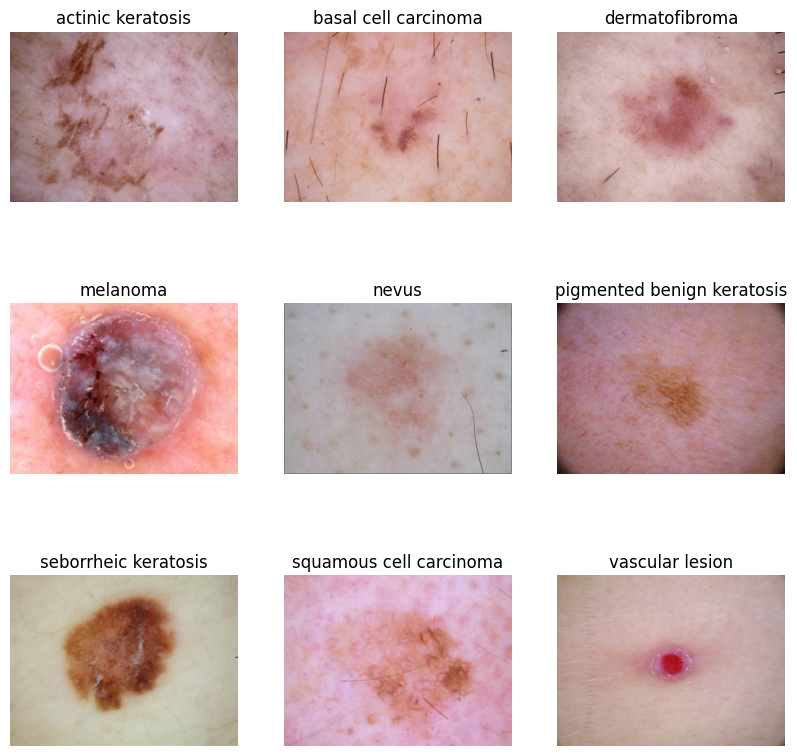

In [ ]:
# Visualizing the images using train data
# Create a 3x3 grid of subplots within a larger figure
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  # Read the second image file for each class and convert it to an array
  image = plt.imread(str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis('off')

Data Optimization for Loading and Processing for Model

In [ ]:
# Set the AUTOTUNE parameter to the experimental AUTOTUNE value from the tf.data module
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Cache the training dataset, shuffle it with a buffer size of 1000, and prefetch elements using the AUTOTUNE buffer size
train_ds = x_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Cache the validation dataset and prefetch elements using the AUTOTUNE buffer size
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Creating Model (Before data prepration):**

In [ ]:
## Creating a CNN model with 3 convolution layers along with maxpooling, dense layer with 128 neurons

# Initialize the Sequential model
model = Sequential()
# Rescale input data to range [0,1] and define input shape
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width,3)))
# Add convolutional layers along and applying max pooling to reduce spatial dimensions
model.add(Conv2D(16, kernel_size=(3, 3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
#model.add(MaxPool2D(pool_size = (2,2)))
# Flatten the feature maps to feed into fully connected layers
model.add(Flatten())
# Add a fully connected layer with 128 neurons and ReLU activation function
model.add(Dense(128,activation='relu'))
# Add the output layer with 9 neurons (one for each class) and softmax activation function for multi-class classification
model.add(Dense(9,activation='softmax'))

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 129600)            0

In [ ]:
#Model Compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
308/308 [==============================] - 819s 3s/step - loss: 1.9300 - accuracy: 0.3383 - val_loss: 1.5218 - val_accuracy: 0.4232
Epoch 2/15
308/308 [==============================] - 461s 1s/step - loss: 1.2253 - accuracy: 0.5528 - val_loss: 1.0473 - val_accuracy: 0.6110
Epoch 3/15
308/308 [==============================] - 458s 1s/step - loss: 0.9263 - accuracy: 0.6749 - val_loss: 0.8929 - val_accuracy: 0.6988
Epoch 4/15
308/308 [==============================] - 444s 1s/step - loss: 0.6829 - accuracy: 0.7706 - val_loss: 0.7465 - val_accuracy: 0.7593
Epoch 5/15
308/308 [==============================] - 432s 1s/step - loss: 0.5125 - accuracy: 0.8293 - val_loss: 0.6235 - val_accuracy: 0.8037
Epoch 6/15
308/308 [==============================] - 449s 1s/step - loss: 0.3872 - accuracy: 0.8675 - val_loss: 0.6356 - val_accuracy: 0.7992
Epoch 7/15
308/308 [==============================] - 446s 1s/step - loss: 0.2969 - accuracy: 0.9018 - val_loss: 0.5494 - val_accuracy: 0.8260

**Conclusion**:
Train Accuracy seems to be good but model shows bad accuracy for Validation data

## **Data Prepration**

In [ ]:
# Data Augmentation:

data_augmentation = keras.Sequential([
    # Randomly flip the input images horizontally
    layers.RandomFlip("horizontal"),
    # Randomly rotate the input images by a maximum of 0.1 radians
    layers.RandomRotation(0.1),
    # Randomly zoom into the input images by a maximum of 10%
    layers.RandomZoom(0.1),
    # Randomly adjust the brightness of the input images by a maximum of 0.1
    layers.RandomContrast(0.1)
])

In [ ]:
#Handeling Class Imbalance:
# Create an empty list to store dictionaries
class_diff_data = []

# Iterate through each class name
for name in class_names:
    number = len(list(data_dir_train.glob(f'{name}/*.jpg')))  # Count the number of images in the class
    # Append the class name and the number of images as a dictionary to the list
    class_diff_data.append({'class': name, 'number': number})

# Create a DataFrame from the list of dictionaries
class_diff = pd.DataFrame(class_diff_data)

# Display the DataFrame containing class names and the number of images in each class
class_diff

,class,number
0,actinic keratosis,129
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


In [ ]:
#Handeling Class Imbalance:

#Counting total image in orignal dataset:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

## Creating dataframe with the path and label for the orginal dataset
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,melanoma
1,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,melanoma
2,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,melanoma
3,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,melanoma
4,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,melanoma
...,...,...
2249,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,actinic keratosis
2250,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,actinic keratosis
2251,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,actinic keratosis
2252,/content/gdrive/MyDrive/Modeling Data/CNN/Skin...,actinic keratosis


In [ ]:
## Counting total sample before augmentation:
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             129
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [ ]:
!pip install Augmentor

In [ ]:
# Iterating all classes:
import Augmentor
path_to_training_dataset=data_dir_train

for class_name in class_names:
    p = Augmentor.Pipeline((path_to_training_dataset / class_name).as_posix())
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(100)

Initialised with 129 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A0E405ED1B0>: 100%|██████████| 100/100 [00:05<00:00, 17.94 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A0E405EEC50>: 100%|██████████| 100/100 [00:10<00:00,  9.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A0E4272FFA0>: 100%|██████████| 100/100 [00:07<00:00, 14.06 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7A0E40618160>: 100%|██████████| 100/100 [00:24<00:00,  4.12 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=853x680 at 0x7A0E427780D0>: 100%|██████████| 100/100 [00:16<00:00,  6.15 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A0E413B6BF0>: 100%|██████████| 100/100 [00:05<00:00, 19.60 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7A0E405EEE30>: 100%|██████████| 100/100 [00:08<00:00, 11.79 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A0E4279D8A0>: 100%|██████████| 100/100 [00:05<00:00, 19.29 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Modeling Data/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A0E4061B7C0>: 100%|██████████| 100/100 [00:04<00:00, 24.38 Samples/s]


In [ ]:
# Count of total augmented images:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

14550


In [ ]:
#Craetng new path:
new_path = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


## Creating new list with all the labels of the diseases for the newly generated images
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(new_path, lesion_list_new))

## Creating a dataframe df2 containing the path and label of all the augmented images generated
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# Concatenating df2 to original_df
new_df = pd.concat([original_df, df2], ignore_index=True)

In [ ]:
## Value count of the number of samples in the dataset for each diseases
new_df['Label'].value_counts()

Label
pigmented benign keratosis    2062
melanoma                      2038
basal cell carcinoma          1976
nevus                         1957
actinic keratosis             1879
squamous cell carcinoma       1781
vascular lesion               1739
dermatofibroma                1695
seborrheic keratosis          1677
Name: count, dtype: int64

## *Creating Model after data prepration *

In [ ]:
## Parameters for the dataset
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
## Training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16804 files belonging to 9 classes.
Using 13444 files for training.


In [ ]:
## Validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16804 files belonging to 9 classes.
Using 3360 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
### Final Model
model = Sequential()

# Rescaling the 1st layer
model.add(layers.Rescaling(1./255,input_shape=(img_height, img_width,3)))
# Add convolutional layers along and applying max pooling to reduce spatial dimensions and dropout regularization to prevent overfitting
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
# Flatten the feature maps to feed into fully connected layers
model.add(layers.Flatten())
# Add a fully connected layers with 256, 128 and 64 neurons and ReLU activation function
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.25))
# Add the output layer with 9 neurons (one for each class) and softmax activation function for multi-class classification
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)      

In [26]:
## Training the final model for 30 epochs
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=epochs
)

Epoch 1/15
421/421 [==============================] - 1848s 3s/step - loss: 2.0066 - accuracy: 0.2250 - val_loss: 1.7264 - val_accuracy: 0.3283
Epoch 2/15
421/421 [==============================] - 944s 2s/step - loss: 1.5976 - accuracy: 0.3688 - val_loss: 1.4052 - val_accuracy: 0.4542
Epoch 3/15
421/421 [==============================] - 959s 2s/step - loss: 1.4521 - accuracy: 0.4342 - val_loss: 1.2035 - val_accuracy: 0.5232
Epoch 4/15
421/421 [==============================] - 959s 2s/step - loss: 1.3056 - accuracy: 0.4946 - val_loss: 1.1145 - val_accuracy: 0.5693
Epoch 5/15
421/421 [==============================] - 933s 2s/step - loss: 1.1620 - accuracy: 0.5562 - val_loss: 0.9174 - val_accuracy: 0.6670
Epoch 6/15
421/421 [==============================] - 970s 2s/step - loss: 1.0027 - accuracy: 0.6242 - val_loss: 0.8001 - val_accuracy: 0.7158
Epoch 7/15
421/421 [==============================] - 930s 2s/step - loss: 0.8842 - accuracy: 0.6703 - val_loss: 0.5948 - val_accuracy: 0.799

I have tried for 15 Epochs only as high epochs was taking loy of time and the execution was breaking as well.
But Epoch ~30 would have given Heigher Accuracy :-)

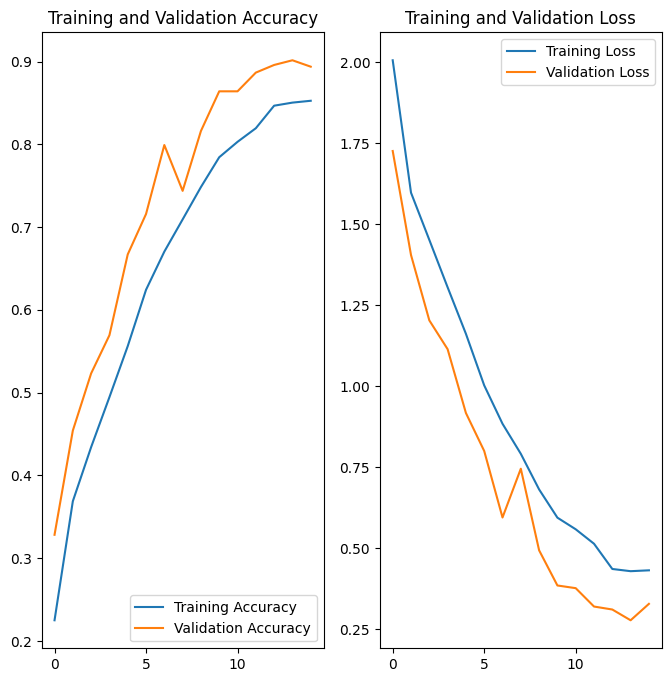

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Model Testing**

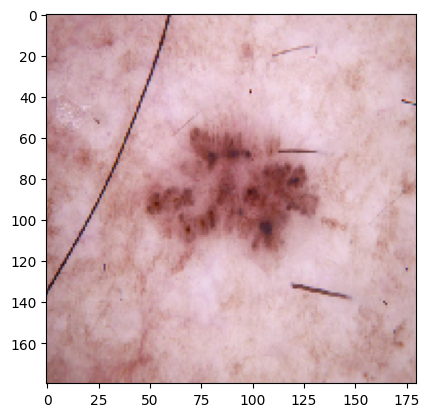

1/1 [==============================] - 0s 218ms/step
Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Get a list of paths for all images in the test dataset for a specific class
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)

# Randomly select an image from the list
selected_image_path = np.random.choice(Test_image)

# Load the selected image, resize it to match the input size of your model (180x180), and plot it
Test_image = load_img(selected_image_path, target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)
plt.show()

# Preprocess the image for prediction
img = np.expand_dims(Test_image,axis=0)

# Make predictions using the model
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]

# Print the actual and predicted classes
actual_class = class_names[1]  # Assuming class_names[1] is the correct class
print(f"Actual Class: {actual_class}")
print(f"Predicted Class: {pred_class}")